In [1]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('Real Estate Data.csv')
df=df.drop(columns=['No'])
df.head(10)

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
5,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,2012.667,34.5,623.47310,7,24.97933,121.53642,40.3
7,2013.417,20.3,287.60250,6,24.98042,121.54228,46.7
8,2013.500,31.7,5512.03800,1,24.95095,121.48458,18.8
9,2013.417,17.9,1783.18000,3,24.96731,121.51486,22.1


In [3]:
len(df)

414

In [4]:
df.isna().any()

X1 transaction date                       False
X2 house age                              False
X3 distance to the nearest MRT station    False
X4 number of convenience stores           False
X5 latitude                               False
X6 longitude                              False
Y house price of unit area                False
dtype: bool

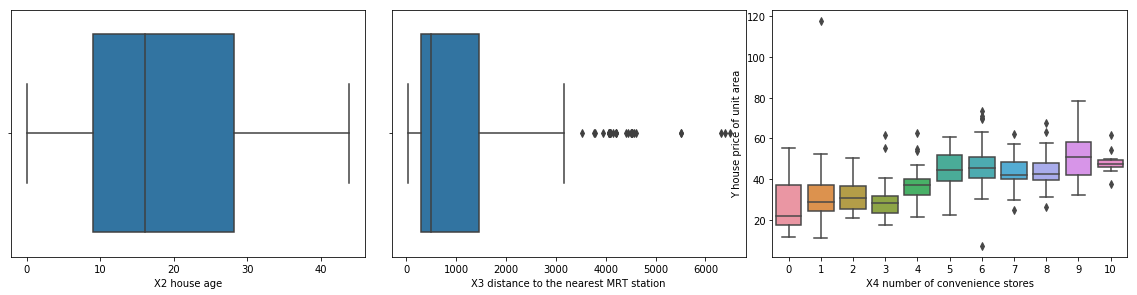

In [5]:
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
sns.boxplot(data=df,x='X2 house age')

plt.subplot(2,3,2)
sns.boxplot(data=df, x='X3 distance to the nearest MRT station')

plt.subplot(2,3,3)
sns.boxplot(data=df,x='X4 number of convenience stores',y='Y house price of unit area')

plt.subplots_adjust(wspace=.075)

Text(0.5,1,'Longitude')

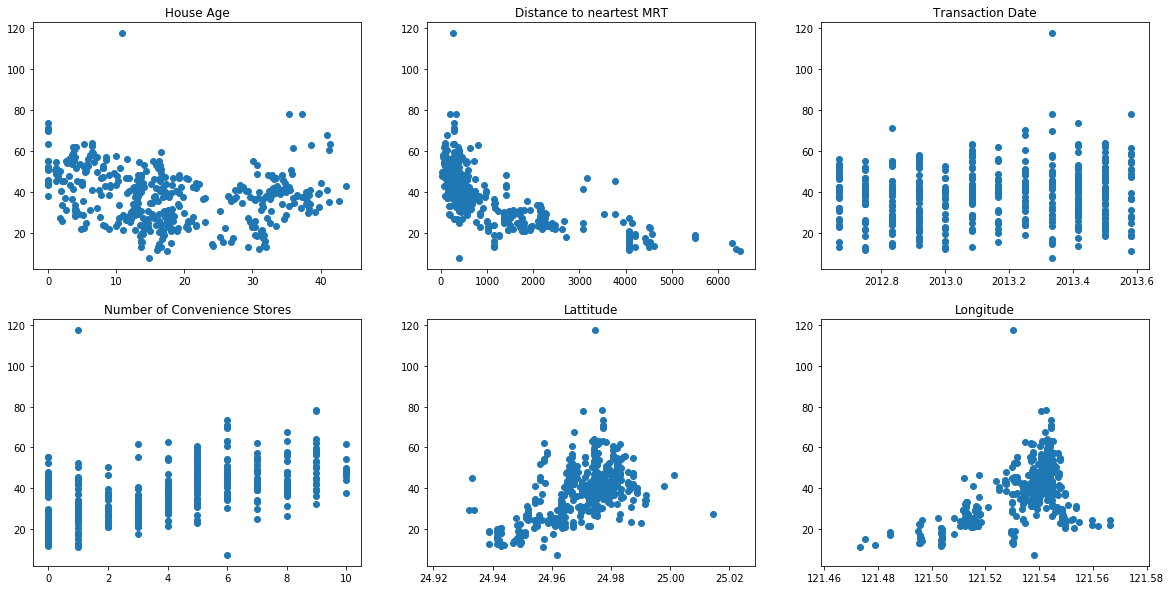

In [6]:
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
plt.scatter(df['X2 house age'],df['Y house price of unit area'])
plt.title('House Age')

plt.subplot(2,3,2)
plt.scatter(df['X3 distance to the nearest MRT station'],df['Y house price of unit area'])
plt.title('Distance to neartest MRT')

plt.subplot(2,3,3)
plt.scatter(df['X1 transaction date'],df['Y house price of unit area'])
plt.title('Transaction Date')

plt.subplot(2,3,4)
plt.scatter(df['X4 number of convenience stores'],df['Y house price of unit area'])
plt.title('Number of Convenience Stores')

plt.subplot(2,3,5)
plt.scatter(df['X5 latitude'],df['Y house price of unit area'])
plt.title('Lattitude')

plt.subplot(2,3,6)
plt.scatter(df['X6 longitude'],df['Y house price of unit area'])
plt.title('Longitude')


In [7]:
df.corr()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
X1 transaction date,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2 house age,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


In [8]:
x1 = df[['X2 house age','X3 distance to the nearest MRT station','X4 number of convenience stores','X5 latitude','X6 longitude']]
y = df['Y house price of unit area']
x_train_1, x_test_1, y_train, y_test = train_test_split(x1, y, train_size = 0.9, test_size = 0.1, random_state=1)

In [9]:
model_1 = LinearRegression()
model_1.fit(x_train_1,y_train)
y_predict_1 = model_1.predict(x_test_1)

In [10]:
model_1_coef = list(zip(x1.columns,model_1.coef_))
print(model_1_coef)

[('X2 house age', -0.26137584514468326), ('X3 distance to the nearest MRT station', -0.004344699753401366), ('X4 number of convenience stores', 1.1220358183430448), ('X5 latitude', 244.45170693974148), ('X6 longitude', -14.674429437096592)]


In [11]:
print('Train score is: '+str(model_1.score(x_train_1,y_train)))
print('Test score is: '+str(model_1.score(x_test_1,y_test)))

Train score is: 0.5476966368903253
Test score is: 0.7692436778698322


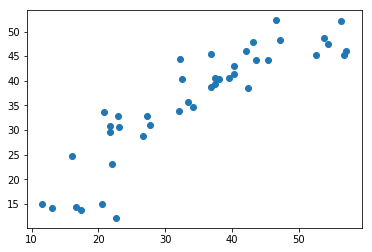

In [12]:
plt.scatter(y_test,y_predict_1)

In [13]:
x2 = x1.drop(columns=['X3 distance to the nearest MRT station'])
x_train_2, x_test_2, y_train, y_test = train_test_split(x2, y, train_size = 0.9, test_size = 0.1, random_state=1)

In [14]:
model_2 = LinearRegression()
model_2.fit(x_train_2,y_train)
y_predict_2 = model_2.predict(x_test_2)

In [15]:
model_2_coef = list(zip(x2.columns,model_2.coef_))
print(model_2_coef)

[('X2 house age', -0.267560856898939), ('X4 number of convenience stores', 1.5316223406446094), ('X5 latitude', 343.37549061504785), ('X6 longitude', 206.81005176446087)]


In [16]:
print('Train score is: '+str(model_2.score(x_train_2,y_train)))
print('Test score is: '+str(model_2.score(x_test_2,y_test)))

Train score is: 0.5106067247173831
Test score is: 0.7358547852508232


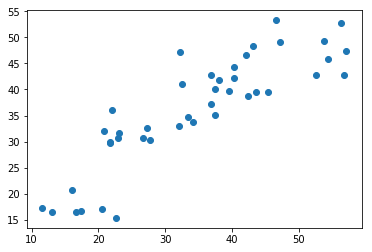

In [17]:
plt.scatter(y_test,y_predict_2)

In [18]:
x3 = x2.drop(columns=['X2 house age'])
x_train_3, x_test_3, y_train, y_test = train_test_split(x3, y, train_size = 0.9, test_size = 0.1)

model_3 = LinearRegression()
model_3.fit(x_train_3,y_train)
y_predict_3 = model_3.predict(x_test_3)

In [19]:
model_3_coef = list(zip(x3.columns,model_3.coef_))
print(model_3_coef)

[('X4 number of convenience stores', 1.5113827787568672), ('X5 latitude', 324.8379979569061), ('X6 longitude', 221.06623741229376)]


In [20]:
print('Train score is: '+str(model_3.score(x_train_3,y_train)))
print('Test score is: '+str(model_3.score(x_test_3,y_test)))

Train score is: 0.4798953890535531
Test score is: 0.48026407012201694


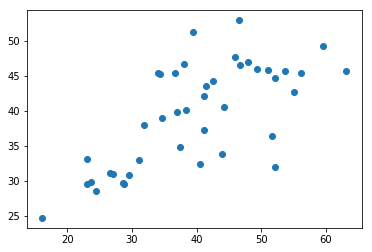

In [21]:
plt.scatter(y_test,y_predict_3)